<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/intro/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short recap on important statistical principles

- Model --> Data (Sampling)
    - probability distribution (pdf)
- Data --> Model (Estimation) 
    - using the method of moments
    - sampling distribution
    - goodness of estimation procedure

In [20]:
# Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

#To make ploting consitent
sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline
plt.style.use('default')
np.random.seed(42)

## The car example

You drive 100 km, how many liters $x$ of gas do you need? We assume that the data is generated by a normal distribution 

$$
    X \sim N(\mu, \sigma^2)
$$

Let's assume that we know the parameters of the distribution: $\mu=6, \sigma^2=1$. The pdf of the car example. 

Text(0, 0.5, 'p(x) (density)')

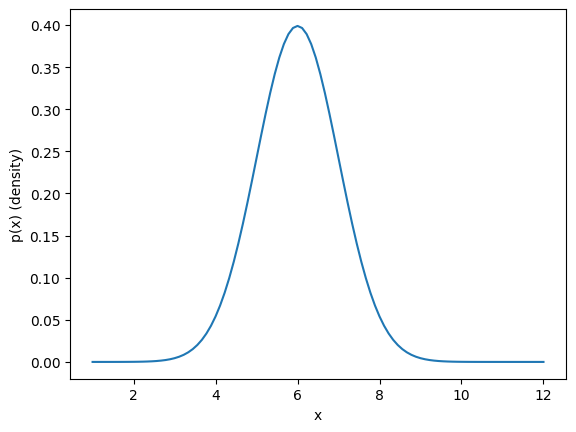

In [21]:
from scipy.stats import norm
dist = norm(loc=6,scale=1)
xv=np.linspace(1,12,100)
plt.plot(xv, dist.pdf(xv))
plt.xlabel('x')
plt.ylabel('p(x) (density)')

### Sampling Model --> Data 

We sample one random variable. This comes from the normal distribution. In math:

$$
    x \sim N(6,1)
$$

In [22]:
np.random.normal(loc=6,scale=1)

6.496714153011233

If we sample very many of those, their relative histogram becomes the discribution

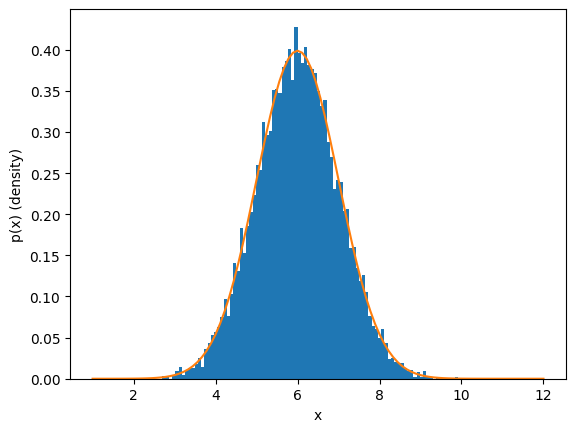

In [23]:
# Repeat several times to see that data varies
x  = np.random.normal(loc=6, scale=1, size=int(1e4))  # changed to 1e4
xv = np.linspace(1, 12, 100)
plt.hist(x, density=True, bins=100)  # Need relative
plt.plot(xv, dist.pdf(xv))
plt.xlabel('x')
plt.ylabel('p(x) (density)')
plt.show()

### Estimation of the parameters (Data --> Model)
Now, we have a sample of data. 

In [24]:
x = np.array([6.27045683, 5.94976189, 5.76105195, 5.09243634, 5.42322867, 6.75539123, 6.50091719, 5.02244476, 6.09933231, 6.75138712])

We can use this to **estimate** (in ML lingo do **fitting** / **training**) the parameters of the model. For the Gaussian distribution the parameters are $\mu$ and $\sigma^2$.

The "gold standard" is to use the **maximum likelihood estimation** (MLE), estimator. Which we will discuss in detail later. But here we use the **method of moments**, another approach used to estimate the parameters (limited mainly to the statistics setting)

#### Estimation using the methods of moment

A fundamental theorem in statistics it the law of large numbers. It states that the mean of a sample converges to the expected value of the distribution as the sample size increases.

$$
    \lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n x_i = \mathbb{E}[X] = \int x \cdot p(x) dx
$$

Of course, we can't sample an infinite number of times, but we can use the sample mean as an estimator for the expected value.

$$
    \mathbb{E}[X] \approx \frac{1}{n} \sum_{i=1}^n x_i
$$

This Trick is called Monte Carlo approximation and is a powerfull tool in machine learning and deep learning (we will use it a lot also for other things).


If we calculate the expectation of a Gaussian distribution (a bit work, but we can do it), we get:

$$
    \mathbb{E}[X] = \mu
$$

and the variance:

$$
    \mathbb{E}[(X-\mathbb{E}[X])^2] =  \sigma^2
$$


Thus, the method of moments provides simple, intuitive estimators: just replace theoretical expectations by their empirical counterparts. For the Gaussian, this immediately gives the sample mean and variance as estimates for $\mu$ and $\sigma^2$.

$$
    \hat \mu = \frac{1}{n} \sum_{i=1}^n x_i
$$

$$
    \hat \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat \mu)^2
$$


In [25]:
mu_hat = np.mean(x)
sigma2_hat = np.mean((x - np.mean(x))**2)
print("Estimated parameters: mu = ", mu_hat, "sigma2 = ", sigma2_hat)

Estimated parameters: mu =  5.962640829 sigma2 =  0.36267445234350126


Of course we cannot expect that the estimated parameters are exactly the true parameters. But is it a good estimate? To answer this question, we repeat the sampling process a large number of times (runs). 

## Goodness of estimation

### Sampling Distribution
We repeat the sampling process a large number of times (runs). We record what we estimated. 

In [26]:
n = 10
runs = 10000
mu = np.zeros(runs)
sigma2 = np.zeros(runs)
for i in range(runs):
    x  = np.random.normal(loc=6,scale=1,size=n) #Sampling n 
    m = np.mean(x)
    mu[i] = m #calculation of the estimate
    sigma2[i] = np.mean((x - m)**2)

In [27]:
mu[0:7], sigma2[0:7] #Different values for different runs

(array([6.07457261, 6.19433761, 6.32990325, 6.05471509, 5.87202272,
        5.54728133, 6.10682453]),
 array([0.62857065, 1.04553725, 0.76187242, 1.00960681, 0.44506761,
        0.66140585, 0.63962059]))

In [28]:
np.mean(mu) #Unbiased for n-->inf you get the true value 6

6.002327015394352

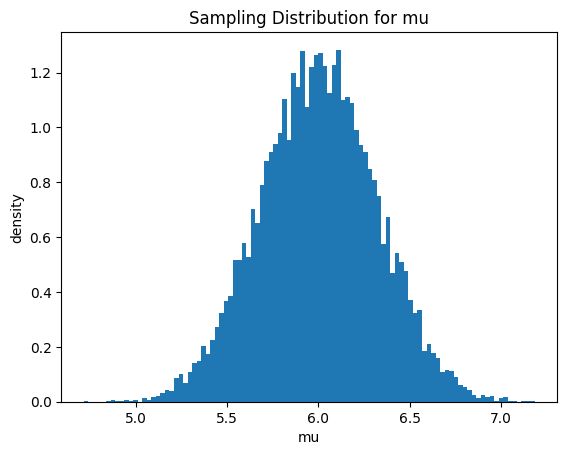

In [29]:
plt.hist(mu,100, density=True)
plt.xlabel('mu')
plt.ylabel('density')
plt.title('Sampling Distribution for mu')
plt.show()

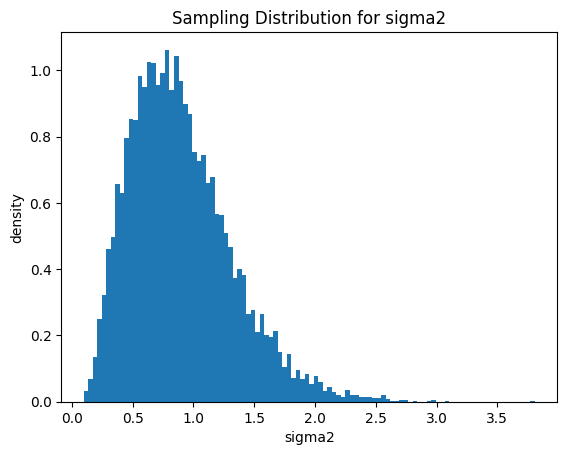

In [30]:
#Sampling Distribution for sigma
plt.hist(sigma2,100, density=True)
plt.xlabel('sigma2')
plt.ylabel('density')
plt.title('Sampling Distribution for sigma2')
plt.show()

In [31]:
np.mean(sigma2) #0.898 Oups!!!!

0.8977875553679312

### Little Exercise

Fix estimate for $\hat \sigma^2$.

## The Power of Sampling

On the one hand, we have the **theoretical** approach. We know the pdf of the data and we can calculate the expectation exactly, this is working in "probability land"

A often simpler (but less elegant) to use samples. You can use this approch to build intution and check your theoretical ideas.

### Example:

We have a random variable $X$ with pdf $p(x)$. We want to what happens when we square it. What is the pdf of $X^2$?

Think a moment and draw the pdf of $X^2$ on a piece of paper.

Now, let's do it with samples in code.


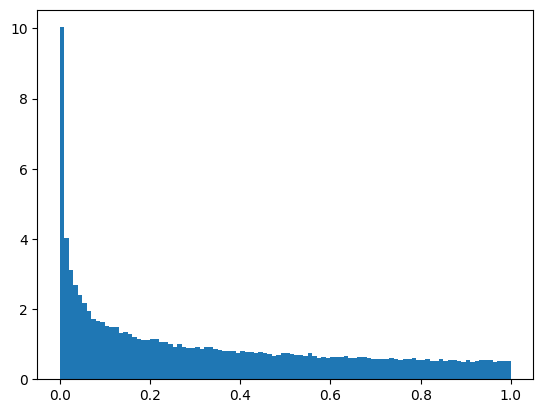

In [32]:
x = np.random.uniform(0,1,100000)
plt.hist(x**2,100, density=True)
plt.show()